# Capstone Project - The Battle of the Neighborhoods (Week 2)
## Applied Data Science Capstone by IBM/Coursera

## [Introduction](#intro)
## [Data](#data)
## [Methodology](#methodology)
## [Results](#results)
## [Discussion](#discussion)
## [Analysis](#analysis)
## [Conclusion](#conclusion)

## Introduction: Business Problem <a id='intro' name="introduction"></a>

Hue and Da Nag are two cities in central Vietnam. They are both on the coast of Vietnam, but Da Nang is more renowned for beaches than Hue. 
Hue on the other hand is known for being the former center of power in Vietnam and was the seat of Royalty until 1947.  
Both a major tourist attractions, or at least were until Covid19. 
I will compare the two cities as they stand today.
In particular I will look at the tips and see if there is a correlation between the length of the tip and the rating given.
The work here is aimed at someone who wants to make a decision about which city to visit.


# Data<a id='data' name="data"></a>

In [1]:
import pandas as pd
import numpy as np
!pip install geocoder
import geocoder
import time
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
print("Imported")

     |████████████████████████████████| 98 kB 7.8 MB/s  eta 0:00:01


ModuleNotFoundError: No module named 'wordcloud'

In [2]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import IFrame
print('Libraries imported.')

     |████████████████████████████████| 94 kB 4.7 MB/s  eta 0:00:01
Libraries imported.


Find the latitude and longitude of Da Nang, Vietnam

In [3]:
address = 'Da Nang, VN'

geolocator = Nominatim(user_agent="da_nang_explorer")
location_danang = geolocator.geocode(address)
latitude_danang = location_danang.latitude
longitude_danang = location_danang.longitude
print('The geograpical coordinate of Da Nang is {}, {}.'.format(latitude_danang, longitude_danang))

The geograpical coordinate of Da Nang is 16.068, 108.212.


Find the latitude and longitude of Hue, Vietnam

In [4]:
address = 'Hue, VN'

geolocator2 = Nominatim(user_agent="hue_explorer")
location = geolocator2.geocode(address)
latitude_hue = location.latitude
longitude_hue = location.longitude
print('The geograpical coordinate of Hue is {}, {}.'.format(latitude_hue, longitude_hue))

The geograpical coordinate of Hue is 16.4638013, 107.5821911.


Lets look at the locations of Hue and Da Nang on a map

In [5]:
# create map of Da Nang and Hue using latitude and longitude values
map_cities = folium.Map(location=[((latitude_danang + latitude_hue)/2), ((longitude_danang + longitude_hue)/2)], zoom_start=10)


folium.Marker(
    location=[latitude_danang, longitude_danang],
    popup="Da Nang",
    icon=folium.Icon(icon="green"),
).add_to(map_cities)

folium.Marker(
    location=[latitude_hue, longitude_hue],
    popup="Hue",
    icon=folium.Icon(icon="green"),
).add_to(map_cities)
   
map_cities

# Methodology<a id='methodology' name="methodology"></a>

FourSquare details

In [6]:
# @hidden_cell
CLIENT_ID = 'ASLRSSRSCZFW0ARKQMC1D1GLL34HUDLR05X1QTOHKSVCFKCD' # your Foursquare ID
CLIENT_SECRET = 'LMGOR3GF2MCQRV0AEDHUH32EQGTYGYARI3X033ZCMUGELV0T' # your Foursquare Secret
ACCESS_TOKEN = 'TAGWFHVL2HQG5MU3EO1MOZHPEIJX0HAZ14TZ5TRGWXAUH44J' # your FourSquare Access Token
VERSION = '20180323' #20180604
LIMIT = 100
radius =4000

Get some information from FourSquare about Da Nang

In [7]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_danang, 
    longitude_danang, 
    radius, 
    LIMIT)

In [8]:
results_danang = requests.get(url).json()
results_danang

{'meta': {'code': 200, 'requestId': '6032c548cfd3f91592e8e786'},
 'response': {'headerLocation': 'Da Nang',
  'headerFullLocation': 'Da Nang',
  'headerLocationGranularity': 'city',
  'totalResults': 131,
  'suggestedBounds': {'ne': {'lat': 16.104000036000038,
    'lng': 108.249393644179},
   'sw': {'lat': 16.031999963999965, 'lng': 108.17460635582101}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '582b1746641e5c276f013971',
       'name': "Pizza 4P's",
       'contact': {},
       'location': {'address': '8 Hoàng Văn Thụ',
        'lat': 16.062674975021636,
        'lng': 108.2228449147913,
        'labeledLatLngs': [{'label': 'display',
          'lat': 16.062674975021636,
          'lng': 108.2228449147913}],
        'distance': 1302,
        'cc': 'VN',
        'c

In [9]:
items_danang = results_danang['response']['groups'][0]['items']
items_danang[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '582b1746641e5c276f013971',
  'name': "Pizza 4P's",
  'contact': {},
  'location': {'address': '8 Hoàng Văn Thụ',
   'lat': 16.062674975021636,
   'lng': 108.2228449147913,
   'labeledLatLngs': [{'label': 'display',
     'lat': 16.062674975021636,
     'lng': 108.2228449147913}],
   'distance': 1302,
   'cc': 'VN',
   'city': 'Đà Nẵng',
   'state': 'Thành Phố Đà Nẵng',
   'country': 'Việt Nam',
   'formattedAddress': ['8 Hoàng Văn Thụ',
    'Đà Nẵng',
    'Thành Phố Đà Nẵng',
    'Việt Nam']},
  'categories': [{'id': '4bf58dd8d48988d1ca941735',
    'name': 'Pizza Place',
    'pluralName': 'Pizza Places',
    'shortName': 'Pizza',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
     'suffix': '.png'},
    'primary': True}],
  'verified': False,
  'stats': {'tipCount': 0,
   'usersCount': 0,
   'check

In [10]:
#fetching omly relevant data from categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#flatten JSON, Normalize JSON to Dataframe
dataframe = pd.json_normalize(items_danang) 

# filter columns,consider only required columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
nearby_danang = dataframe.loc[:, filtered_columns]

# filter the category for each row
nearby_danang['venue.categories'] = nearby_danang.apply(get_category_type, axis=1)

# clean columns
nearby_danang.columns = [col.split('.')[-1] for col in nearby_danang.columns]

#replce NaN values with Not found in address
nearby_danang['address'] = nearby_danang['address'].fillna("Not found")
nearby_danang.head()   

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,neighborhood,id
0,Pizza 4P's,Pizza Place,8 Hoàng Văn Thụ,16.062675,108.222845,"[{'label': 'display', 'lat': 16.06267497502163...",1302,VN,Đà Nẵng,Thành Phố Đà Nẵng,Việt Nam,"[8 Hoàng Văn Thụ, Đà Nẵng, Thành Phố Đà Nẵng, ...",NaN,NaN,NaN,582b1746641e5c276f013971
1,cộng cà phê,Coffee Shop,39,16.068063,108.223512,"[{'label': 'display', 'lat': 16.06806287945548...",1231,VN,Đà Nẵng,Thành Phố Đà Nẵng,Việt Nam,"[39 (Nguyễn Thái Học), Đà Nẵng, Thành Phố Đà N...",Nguyễn Thái Học,551105,NaN,5a26a41a31ac6c676705e94c
2,Nướng Đà Thành,BBQ Joint,Lô 1-2 B2.4 Nguyễn Văn Linh,16.060689,108.218386,"[{'label': 'display', 'lat': 16.06068929153090...",1062,VN,Đà Nẵng,Thành Phố Đà Nẵng,Việt Nam,[Lô 1-2 B2.4 Nguyễn Văn Linh (Huỳnh Thúc Kháng...,Huỳnh Thúc Kháng,NaN,NaN,5405d20d498eae2180a53eab
3,Thìa Gỗ Restaurant - Danang (Quán ăn Thìa Gỗ -...,Vietnamese Restaurant,37 Ba Đinh,16.076115,108.218690,"[{'label': 'display', 'lat': 16.07611473938317...",1152,VN,Đà Nẵng,Thành Phố Đà Nẵng,Việt Nam,"[37 Ba Đinh, Đà Nẵng, Thành Phố Đà Nẵng, Việt ...",NaN,551300,NaN,5aabf13ed552c7495c4b16cc
4,Mì Quảng Bà Mua,Vietnamese Restaurant,21 Trần Bình Trọng,16.065974,108.219153,"[{'label': 'display', 'lat': 16.06597405743636...",797,VN,Đà Nẵng,Thành Phố Đà Nẵng,Việt Nam,"[21 Trần Bình Trọng, Đà Nẵng, Thành Phố Đà Nẵn...",NaN,NaN,NaN,4f842b4ce4b05b009467b674


Lets draw a map with all the Da Nang venues we got

In [11]:
# creating map zoom at present Location
map_danang = folium.Map(location=[latitude_danang,longitude_danang],zoom_start=14)

# adding the current location to map
folium.CircleMarker(location=[latitude_danang,longitude_danang],radius=5,color='red',fill=True,fill_color='red').add_to(map_danang)
folium.Marker(location=[latitude_danang,longitude_danang],popup="<strong> Current Location</strong>",icon = folium.Icon(color='red')).add_to(map_danang)

# drawing radius of search
folium.Circle(location=[latitude_danang,longitude_danang],radius=radius,color='blue',opacity=0.5,fill=True,fill_color='blue').add_to(map_danang)

# adding all the popular places around
for lat,lon,name,cate,addr,dist in zip(nearby_danang.lat,nearby_danang.lng,nearby_danang.name,nearby_danang.categories,nearby_danang.address,nearby_danang.distance):
  folium.CircleMarker(location=[lat,lon],radius=5,color="red",fill=True,fill_color='red').add_to(map_danang)
  folium.Marker(location=[lat,lon],
              popup= folium.Popup(('<strong><font color ="red">Name :     </font>'+name+'</strong><br>'+
                                   '<strong><font color ="red">Categorie :    </font>'+cate+'</strong><br>'+
                                   '<strong><font color ="red">Address :    </font>'+addr+'</strong><br>'+
                                   '<strong><font color ="red">Distance :    </font>'+str(dist)+' mts</strong>'
                                   ),max_width=250)).add_to(map_danang)

map_danang

Pull info on Hue venues

In [19]:

url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_hue, 
    longitude_hue, 
    radius, 
    LIMIT)

In [20]:
results_hue = requests.get(url2).json()
results_hue

{'meta': {'code': 200, 'requestId': '6032c6cc2dbbf54b008e8fa8'},
 'response': {'headerLocation': 'Huế',
  'headerFullLocation': 'Huế',
  'headerLocationGranularity': 'city',
  'totalResults': 62,
  'suggestedBounds': {'ne': {'lat': 16.499801336000036,
    'lng': 107.619660190731},
   'sw': {'lat': 16.427801263999964, 'lng': 107.54472200926901}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd1ab4a5e0cce720acfa184',
       'name': 'La Residence Hue Hotel & Spa',
       'contact': {},
       'location': {'address': '5 Le Loi Street',
        'lat': 16.459127862940925,
        'lng': 107.58007233528453,
        'labeledLatLngs': [{'label': 'display',
          'lat': 16.459127862940925,
          'lng': 107.58007233528453}],
        'distance': 567,
        'postalCode'

In [21]:
items_hue = results_hue['response']['groups'][0]['items']
items_hue[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4bd1ab4a5e0cce720acfa184',
  'name': 'La Residence Hue Hotel & Spa',
  'contact': {},
  'location': {'address': '5 Le Loi Street',
   'lat': 16.459127862940925,
   'lng': 107.58007233528453,
   'labeledLatLngs': [{'label': 'display',
     'lat': 16.459127862940925,
     'lng': 107.58007233528453}],
   'distance': 567,
   'postalCode': '530000',
   'cc': 'VN',
   'city': 'Huế',
   'state': 'Tỉnh Thừa Thiên-Huế',
   'country': 'Việt Nam',
   'formattedAddress': ['5 Le Loi Street',
    'Huế',
    'Tỉnh Thừa Thiên-Huế',
    'Việt Nam']},
  'categories': [{'id': '4bf58dd8d48988d132951735',
    'name': 'Hotel Pool',
    'pluralName': 'Hotel Pools',
    'shortName': 'Pool',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_',
     'suffix': '.png'},
    'primary': True}],
  'verified': True,
  'stats'

In [22]:
#fetching omly relevant data from categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#flatten JSON, Normalize JSON to Dataframe
dataframe = pd.json_normalize(items_hue) 

# filter columns,consider only required columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
nearby_hue = dataframe.loc[:, filtered_columns]

# filter the category for each row
nearby_hue['venue.categories'] = nearby_hue.apply(get_category_type, axis=1)

# clean columns
nearby_hue.columns = [col.split('.')[-1] for col in nearby_hue.columns]

#replce NaN values with Not found in address
nearby_hue['address'] = nearby_hue['address'].fillna("Not found")
nearby_hue.head()   

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,La Residence Hue Hotel & Spa,Hotel Pool,5 Le Loi Street,16.459128,107.580072,"[{'label': 'display', 'lat': 16.45912786294092...",567,530000,VN,Huế,Tỉnh Thừa Thiên-Huế,Việt Nam,"[5 Le Loi Street, Huế, Tỉnh Thừa Thiên-Huế, Vi...",NaN,4bd1ab4a5e0cce720acfa184
1,Lạc Thiên,Vietnamese Restaurant,6A Đinh Tiên Hoàng,16.468668,107.585144,"[{'label': 'display', 'lat': 16.468668, 'lng':...",626,NaN,VN,Huế,Tỉnh Thừa Thiên-Huế,Việt Nam,"[6A Đinh Tiên Hoàng (Trần Hưng Đạo), Huế, Tỉnh...",Trần Hưng Đạo,4d3ab780325ff04df0dc1e45
2,Nook Cafe & Bar,Breakfast Spot,7/34 Nguyen Tri Phuong,16.464730,107.593040,"[{'label': 'display', 'lat': 16.46473, 'lng': ...",1162,NaN,VN,Huế,Tỉnh Thừa Thiên-Huế,Việt Nam,"[7/34 Nguyen Tri Phuong, Huế, Tỉnh Thừa Thiên-...",NaN,583848f313bb7732ce36366c
3,The Scarlett Boutique Hotel,Hotel,Not found,16.467528,107.594623,"[{'label': 'display', 'lat': 16.467528, 'lng':...",1390,NaN,VN,NaN,NaN,Việt Nam,[Việt Nam],NaN,57c5bd65498eb3403f51e7e6
4,Nina's Cafe,Vietnamese Restaurant,16/34 Nguyễn Trí Phương,16.464284,107.592762,"[{'label': 'display', 'lat': 16.46428415334502...",1129,NaN,VN,Huế,Tỉnh Thừa Thiên-Huế,Việt Nam,"[16/34 Nguyễn Trí Phương, Huế, Tỉnh Thừa Thiên...",NaN,4c5cdff56ebe2d7faa8bd12e


Lets draw a map of Hue with the venues on it

In [23]:
# creating map zoom at present Location
map_hue = folium.Map(location=[latitude_hue,longitude_hue],zoom_start=14)

# adding the current location to map
folium.CircleMarker(location=[latitude_hue,longitude_hue],radius=5,color='red',fill=True,fill_color='red').add_to(map_danang)
folium.Marker(location=[latitude_hue,longitude_hue],popup="<strong> Current Location</strong>",icon = folium.Icon(color='red')).add_to(map_hue)

# drawing radius of search
folium.Circle(location=[latitude_hue,longitude_hue],radius=radius,color='blue',opacity=0.5,fill=True,fill_color='blue').add_to(map_hue)

# adding all the popular places around
for lat,lon,name,cate,addr,dist in zip(nearby_hue.lat,nearby_hue.lng,nearby_hue.name,nearby_hue.categories,nearby_hue.address,nearby_hue.distance):
  folium.CircleMarker(location=[lat,lon],radius=5,color="red",fill=True,fill_color='red').add_to(map_hue)
  folium.Marker(location=[lat,lon],
              popup= folium.Popup(('<strong><font color ="red">Name :     </font>'+name+'</strong><br>'+
                                   '<strong><font color ="red">Categorie :    </font>'+cate+'</strong><br>'+
                                   '<strong><font color ="red">Address :    </font>'+addr+'</strong><br>'+
                                   '<strong><font color ="red">Distance :    </font>'+str(dist)+' mts</strong>'
                                   ),max_width=250)).add_to(map_hue)

map_hue

Lets get the Hue venue id's and use them to grab the ratings and tips into a dataframe called hue_venue_ids

In [26]:
hue_venue_ids = nearby_hue.iloc[: , [14]].copy() 
hue_venue_ids = hue_venue_ids.reindex(hue_venue_ids.columns.tolist() + ['rating','tips'], axis=1)
hue_venue_ids

,id,rating,tips
0,4bd1ab4a5e0cce720acfa184,NaN,NaN
1,4d3ab780325ff04df0dc1e45,NaN,NaN
2,583848f313bb7732ce36366c,NaN,NaN
3,57c5bd65498eb3403f51e7e6,NaN,NaN
4,4c5cdff56ebe2d7faa8bd12e,NaN,NaN
...,...,...,...
57,4e5f2cbed4c08cf7f597c801,NaN,NaN
58,4d19e2eb401db60cdd8cfda4,NaN,NaN
59,4cd4f834fb595481b3aedb50,NaN,NaN
60,57aac09e498e56d76d99146e,NaN,NaN


We have our id data which we can iterate thru and get the venue rating and tips

Get the venue rating

In [28]:
venues_ids= hue_venue_ids['id']
ratings=[]
for venue_id in venues_ids.values.tolist():
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            latitude_danang, 
            longitude_danang, 
            radius, 
            LIMIT)
    
    # get the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        final_venue_details = final_venue_details.append({
                                                'id': venue_id,
                                                'name' : venue_name,
                                                'likes' : venue_likes,
                                                'rating' : venue_rating,
                                                'tips' : venue_tips
                                              },ignore_index=True)
    except KeyError:
        pass
        

final_venue_details
        

KeyError: 'venue'

In [23]:
#results_hue2 = requests.get(urlvenue).json()
#rating_hue = results_hue2['response']['venue']['rating']
#rating_hue

KeyError: 'venue'

Lets get the tips from the reults_hue2

In [22]:
print(results_hue2['response']['venue']['tips']['groups'])
type(results_hue2['response']['venue']['tips']['groups'])

KeyError: 'venue'

In [29]:
venues_ids= hue_venue_ids['id']
ratings=[]
for venue_id in venues_ids.values.tolist():
    url_hue = url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    
    result_rating = requests.get(url_hue).json()
    print(result_rating)

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c7de8a76ec393f23f828'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c7df8e5f3a38266dc9b5'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c7e0e4b7b103a5d6a429'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c7e1e0b857202a7fd59e'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c7e2cc02e04c9be4f1c9'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c7e32776b86a5892b2d1'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c7e40ac61561dc6f4281'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c80d37228e39e88f9064'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c80ebf8e526ca05de45f'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c80f37228e39e88f9435'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c8108a76ec393f247db5'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '6032c811c90f22500fc52d3b'}, 'response': {}}


In [30]:
final_venue_details.drop_duplicates()

NameError: name 'result' is not defined

# Analysis<a id='analysis' name="analysis"></a> 
### Bar charts go here and counts of venues for Hue and Da Nang

Plot some stuff to look at

Do some linear regression with the rating and tips data

In [ ]:
rom sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize
X = final_venue_details.iloc[:, 3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = final_venue_details.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear fregression
Y_pred = linear_regressor.predict(X)  # make predictions

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
final_venue_details2 = final_venue_details.filter(['rating','tips'], axis=1).copy()
viz = final_venue_details2[['rating', 'tips']]
viz.hist()
plt.show()

In [ ]:
Make a simple regression model

In [ ]:
msk = np.random.rand(len(final_venue_details)) < 0.8
train = final_venue_details[msk]
test = final_venue_details[~msk]

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['rating']])
train_y = np.asanyarray(train[['tips']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

In [ ]:
plt.scatter(train.rating, train.tips,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("rating")
plt.ylabel("tips")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['rating']])
test_y = np.asanyarray(test[['tips']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Not a very good model as the R2 value is veru low

Lets have a look at the types of venues in D Nang as a wordcloud

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
values = ','.join(str(v) for v in data_ids_danang['categories']) 
wordcloud = WordCloud(width=1200, height=800).generate(values) 
stopwords = set(STOPWORDS)

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="pink", width=1200, height=800).generate(values)

Ohh restuarants are popular.

In [ ]:
plt.axis("off")
plt.tight_layout(pad=1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Lets plot a bar chart for the Hue data

In [24]:
count_hue = nearby_hue.groupby('categories').count()
count_hue.sort_values(by = ['name'], inplace=True, ascending=False)
count_hue = count_hue['name']
print("List of placers in Hue")
count_hue

List of placers in Hue


categories
Coffee Shop                     17
Hotel                           13
Vietnamese Restaurant           11
Café                             6
Restaurant                       5
Noodle House                     4
Soup Place                       3
Italian Restaurant               3
BBQ Joint                        3
Pizza Place                      2
Bakery                           2
Spa                              2
Steakhouse                       2
Ice Cream Shop                   2
Pub                              1
Resort                           1
Theme Park Ride / Attraction     1
Surf Spot                        1
Sandwich Place                   1
Snack Place                      1
Nightclub                        1
Thai Restaurant                  1
Seafood Restaurant               1
Airport Service                  1
Night Market                     1
New American Restaurant          1
Multiplex                        1
American Restaurant              1
Japanese 

## Lets plot the venues out for Da Nang

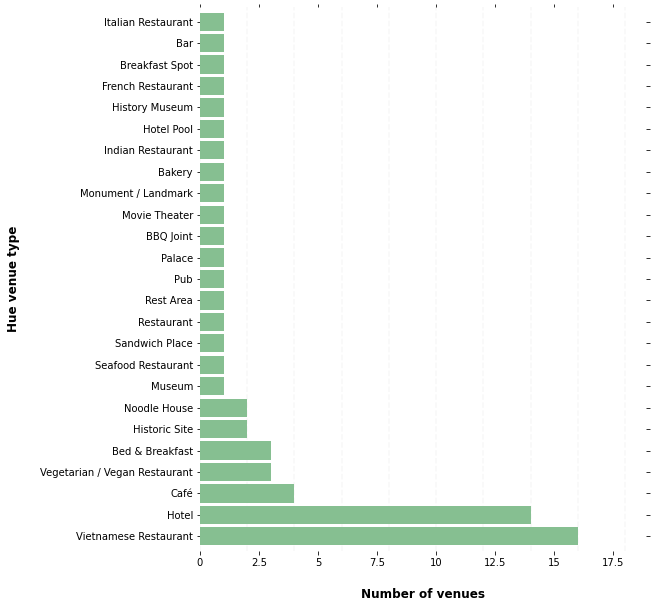

In [120]:
from matplotlib.ticker import StrMethodFormatter
ax = count_hue.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("Number of venues", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Hue venue type", labelpad=20, weight='bold', size=12)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [118]:
count_danang = nearby_danang.groupby('categories').count()
count_danang.sort_values(by = ['name'], inplace=True, ascending=False)
count_danang = count_danang['name']
print("List of places in Da Nang")
count_danang

List of places in Da Nang


categories
Coffee Shop                     17
Hotel                           15
Vietnamese Restaurant           12
Café                             5
Restaurant                       5
Noodle House                     4
Soup Place                       3
BBQ Joint                        3
Italian Restaurant               3
Steakhouse                       2
Spa                              2
Bakery                           2
Ice Cream Shop                   2
Pizza Place                      2
Thai Restaurant                  1
Nightclub                        1
Seafood Restaurant               1
Sandwich Place                   1
Theme Park Ride / Attraction     1
Resort                           1
Pub                              1
Snack Place                      1
Airport Service                  1
Night Market                     1
New American Restaurant          1
Multiplex                        1
American Restaurant              1
Indian Restaurant                1
Hotel Bar

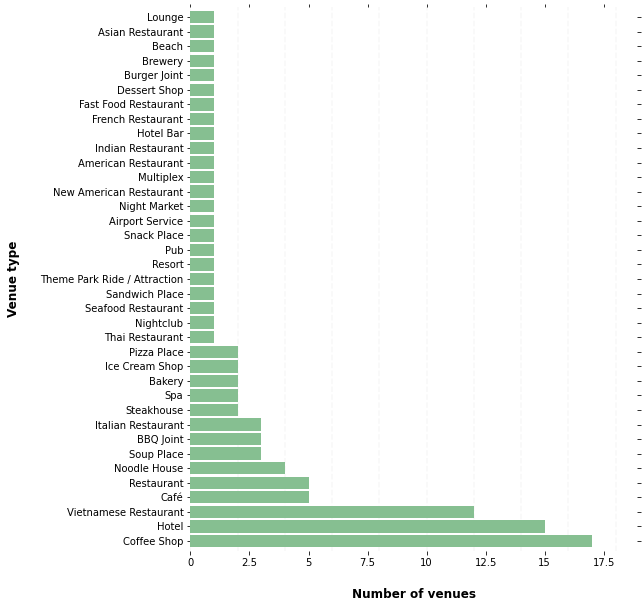

In [119]:
ax = count_danang.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("Number of venues", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("
              
              Da Nang venue type", labelpad=20, weight='bold', size=12)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [121]:
print("There are ",count_danang.shape[0], "types of places to visit in Da Nang and ",count_hue[0],"types of places to visit in Hue.")

There are  37 places to visit in Da Nang and  16 places to visit in Hue.


## Results<a id='results' name="results"></a>

Nothing interesting but the data is confusing a lot different types of resturants for example  fast food, Burger joint and Sandwich place in the Da Nang data.

# Discussion<a id='discussion' name="discussion"></a>

Stuff about US usage verses Vietnam usage, dates of reviews and tips (Argh that is premium API end point call!)

# Conclusion<a id='conclusion' name="conclusion"></a>

Foursquare isn't really used in Vietnam. Maybe Google maps, Tripadvisor, Booking is better for South East  Asia. Plus stuff about dates of ratings and of course Covid19